In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import csv
from scipy import optimize

In [12]:
# plot the time series of order parameter

Lx = 1000 # system size = Lx x Ly
Ly = 20
T = 0.01 # temperature
K = 1
sigma = 0.01
n_steps = int(1e5) # simulation steps
dt = 0.001 # time increment
kmax = 5

num_of_samples = 100
data = np.zeros((7,n_steps-1),dtype=complex) # 7 columns
for s in range(num_of_samples):
    data += np.transpose(
        np.genfromtxt('Lx%d_Ly%d_K%d_T%.1e_sigma%.1e_dt%.1e_t%.1e_S%d.csv'%(Lx,Ly,K,T,sigma,dt,dt*n_steps,s),
                          delimiter=",",dtype=complex))
data /= num_of_samples

In [13]:
t_list = np.abs(data[0])
psi_abs = np.abs(data[1])
psi_angle = np.angle(data[1])

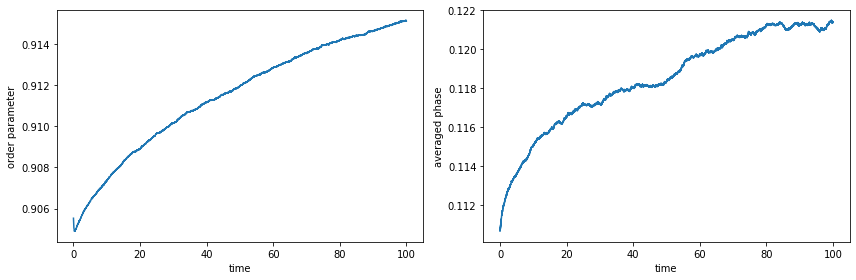

In [14]:
fig = plt.figure()
fig.set_size_inches(w=12,h=4)

plt.subplot(1,2,1)
plt.plot(t_list,psi_abs)
plt.xlabel("time")
plt.ylabel("order parameter")

plt.subplot(1,2,2)
plt.plot(t_list,psi_angle)
plt.xlabel("time")
plt.ylabel("averaged phase")

plt.tight_layout()
plt.show()

In [15]:
def linear_fit(x_data, a, b):
    return -a * x_data + b

fit_re = np.zeros(kmax-1)
fit_im = np.zeros(kmax)
fit_abs = np.zeros(kmax)
fit_re_err = np.zeros(kmax-1)
fit_im_err = np.zeros(kmax)
fit_abs_err = np.zeros(kmax)

for k in range(kmax):
    if k != kmax-1:
        fit_re[k] = optimize.curve_fit(linear_fit, t_list, np.log(np.imag(data[k+2])))[0][0]
        fit_im[k] = optimize.curve_fit(linear_fit, t_list, np.log(np.imag(data[k+2])))[0][0]
        fit_abs[k] = optimize.curve_fit(linear_fit, t_list, np.log(np.abs(data[k+2])))[0][0]
        fit_re_err[k] = np.sqrt(optimize.curve_fit(linear_fit, t_list, np.log(np.real(data[k+2])))[1][0][0])
        fit_im_err[k] = np.sqrt(optimize.curve_fit(linear_fit, t_list, np.log(np.imag(data[k+2])))[1][0][0])
        fit_abs_err[k] = np.sqrt(optimize.curve_fit(linear_fit, t_list, np.log(np.abs(data[k+2])))[1][0][0])
    else:
        fit_im[k] = optimize.curve_fit(linear_fit, t_list, np.log(np.imag(data[k+2])))[0][0]
        fit_abs[k] = optimize.curve_fit(linear_fit, t_list, np.log(np.abs(data[k+2])))[0][0]
        fit_im_err[k] = np.sqrt(optimize.curve_fit(linear_fit, t_list, np.log(np.imag(data[k+2])))[1][0][0])
        fit_abs_err[k] = np.sqrt(optimize.curve_fit(linear_fit, t_list, np.log(np.abs(data[k+2])))[1][0][0])

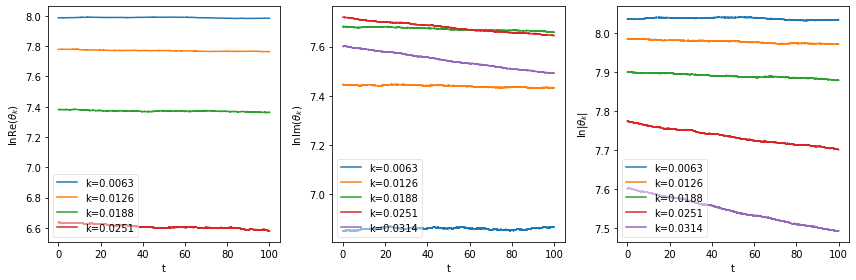

In [16]:
# plot the time series of Fourier modes
fig = plt.figure()
fig.set_size_inches(w=12,h=4)

plt.subplot(1,3,1)
for k in range(kmax-1):
    plt.plot(t_list,np.log(np.real(data[k+2])),label = r'k=%.4f' %(2*(k+1)*np.pi/Lx))
plt.xlabel("t")
plt.ylabel(r"$\ln$Re($\theta_k$)")
plt.legend(loc='lower left', framealpha=0.5)

plt.subplot(1,3,2)
for k in range(kmax):
    plt.plot(t_list,np.log(np.imag(data[k+2])),label = r'k=%.4f' %(2*(k+1)*np.pi/Lx))
plt.xlabel("t")
plt.ylabel(r"$\ln$Im($\theta_k$)")
plt.legend(loc='lower left', framealpha=0.5)

plt.subplot(1,3,3)
for k in range(kmax):
    plt.plot(t_list,np.log(np.abs(data[k+2])),label = r'k=%.4f' %(2*(k+1)*np.pi/Lx))
plt.xlabel("t")
plt.ylabel(r"$\ln|\theta_k|$")
plt.legend(loc='lower left', framealpha=0.5)

plt.tight_layout()
plt.show()

In [17]:
def linear_fit2(x_data, a):
    return a * x_data

k_list = (2*np.pi/Lx) * np.arange(1,kmax+1)
x_data = k_list * k_list

line_re, line_re_var = optimize.curve_fit(linear_fit2, x_data[:-1], fit_re, sigma = fit_re_err)
line_im, line_im_var = optimize.curve_fit(linear_fit2, x_data, fit_im, sigma = fit_im_err)
line_abs, line_abs_var = optimize.curve_fit(linear_fit2, x_data, fit_abs, sigma = fit_abs_err)

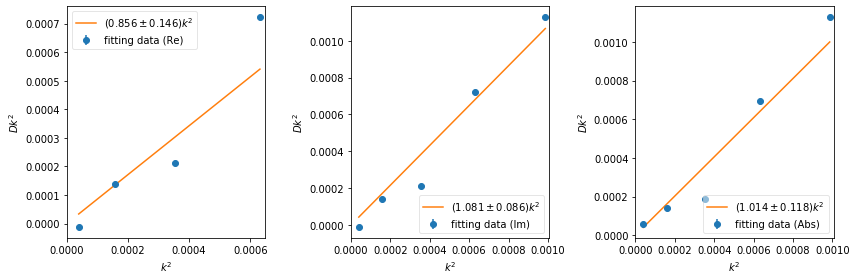

In [18]:
# slopes of the decrease of phases
fig = plt.figure()
fig.set_size_inches(w=12,h=4)

plt.subplot(1,3,1)
plt.errorbar(x_data[:-1],fit_re,yerr=fit_re_err,fmt='o',label='fitting data (Re)')
plt.plot(x_data[:-1],linear_fit2(x_data[:-1], line_re[0]),label=r'$(%.3f \pm %.3f) k^2$' %(line_re[0],np.sqrt(line_re_var)[0][0]))
plt.xlabel(r"$k^2$")
plt.ylabel(r"$Dk^2$")
plt.legend(loc='upper left', framealpha=0.5)
plt.xlim(0,np.square(8.1*np.pi/Lx))
#plt.ylim(-0.004,0.004)

plt.subplot(1,3,2)
plt.errorbar(x_data,fit_im,yerr=fit_im_err,fmt='o',label='fitting data (Im)')
plt.plot(x_data,linear_fit2(x_data, line_im[0]),label=r'$(%.3f \pm %.3f) k^2$' %(line_im[0],np.sqrt(line_im_var)[0][0]))
plt.xlabel(r"$k^2$")
plt.ylabel(r"$Dk^2$")
plt.legend(loc='lower right', framealpha=0.5)
plt.xlim(0,np.square(10.1*np.pi/Lx))
#plt.ylim(-0.001,0.002)

plt.subplot(1,3,3)
plt.errorbar(x_data,fit_abs,yerr=fit_abs_err,fmt='o',label='fitting data (Abs)')
plt.plot(x_data,linear_fit2(x_data, line_abs[0]),label=r'$(%.3f \pm %.3f) k^2$' %(line_abs[0],np.sqrt(line_abs_var)[0][0]))
plt.xlabel(r"$k^2$")
plt.ylabel(r"$Dk^2$")
plt.legend(loc='lower right', framealpha=0.5)
plt.xlim(0,np.square(10.1*np.pi/Lx))
#plt.ylim(-0.001,0.002)

plt.tight_layout()
plt.show()